**Valencia, España**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#cargar archivo .csv sin indice
data=pd.read_csv('España_Valencia_sin_nulos.csv', encoding='latin1')

In [5]:
#verificamos la información del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9447 non-null   int64  
 1   id                           9447 non-null   float64
 2   listing_url                  9447 non-null   object 
 3   scrape_id                    9447 non-null   float64
 4   last_scraped                 9447 non-null   object 
 5   source                       9447 non-null   object 
 6   name                         9447 non-null   object 
 7   neighborhood_overview        9447 non-null   object 
 8   picture_url                  9447 non-null   object 
 9   host_id                      9447 non-null   int64  
 10  host_url                     9447 non-null   object 
 11  host_name                    9447 non-null   object 
 12  host_since                   9447 non-null   object 
 13  host_location     

In [8]:
columnas_objeto = data.select_dtypes(include=['object']).columns

# Contar el número de columnas de tipo objeto
columnas_objeto = data.select_dtypes(include=['object']).columns
indices_columnas_objeto = [data.columns.get_loc(col) for col in columnas_objeto]

# Imprimir resultados
print(f"Número total de columnas con variables de tipo objeto: {len(columnas_objeto)}")
print(f"Números de columna: {indices_columnas_objeto}")

Número total de columnas con variables de tipo objeto: 28
Números de columna: [2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 18, 19, 20, 23, 24, 25, 26, 27, 30, 31, 34, 37, 38, 41, 42, 49]


In [9]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas = data.iloc[:, 1:50] 
cualitativas = data.iloc[:, [2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 18, 19, 20, 23, 24, 25, 26, 27, 30, 31, 34, 37, 38, 41, 42, 49]]

In [10]:
cuantitativas.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9447 non-null   float64
 1   listing_url                  9447 non-null   object 
 2   scrape_id                    9447 non-null   float64
 3   last_scraped                 9447 non-null   object 
 4   source                       9447 non-null   object 
 5   name                         9447 non-null   object 
 6   neighborhood_overview        9447 non-null   object 
 7   picture_url                  9447 non-null   object 
 8   host_id                      9447 non-null   int64  
 9   host_url                     9447 non-null   object 
 10  host_name                    9447 non-null   object 
 11  host_since                   9447 non-null   object 
 12  host_location                9447 non-null   object 
 13  host_about        

<Figure size 1500x800 with 0 Axes>

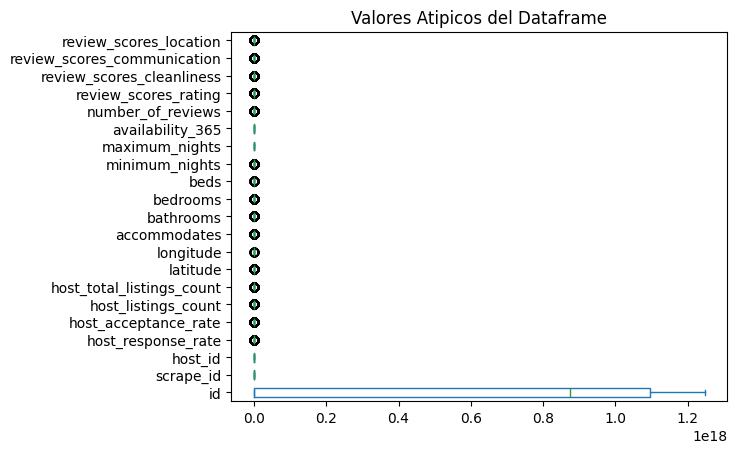

In [11]:
#realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8) )
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show()#dibujamos el diagrama

**Desviación estandar para eliminar outliers en el dataframe**

In [12]:
#Método aplicando desviación estandar. encuentra los valores extremos
cuantitativas = cuantitativas.select_dtypes(include=[np.number])
y = cuantitativas

Limite_Superior = y.mean() + 3 * y.std()
Limite_Inferior = y.mean() - 3 * y.std()

print("Límite superior permitido:", Limite_Superior)
print("Límite inferior permitido:", Limite_Inferior)

Límite superior permitido: id                             2.131709e+18
scrape_id                      2.024090e+13
host_id                        8.716503e+08
host_response_rate             1.457569e+00
host_acceptance_rate           1.566911e+00
host_listings_count            2.488788e+02
host_total_listings_count      4.758434e+02
latitude                       3.953329e+01
longitude                     -2.938217e-01
accommodates                   9.215348e+00
bathrooms                      2.887372e+00
bedrooms                       4.574255e+00
beds                           6.746590e+00
minimum_nights                 6.088035e+01
maximum_nights                 1.697363e+03
availability_365               5.364467e+02
number_of_reviews              2.786456e+02
review_scores_rating           5.870372e+00
review_scores_cleanliness      5.880648e+00
review_scores_communication    5.864690e+00
review_scores_location         5.739055e+00
dtype: float64
Límite inferior permitido: id     

In [13]:
#Obtenemos datos y los outliers se convierten en nulos en el Dataframe
data2= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

id     scrape_id    host_id  host_response_rate  \
0     4.815400e+04  2.024090e+13     219476                1.00   
1     1.371430e+05  2.024090e+13     670775                1.00   
2     1.497150e+05  2.024090e+13       5947                1.00   
3     1.659710e+05  2.024090e+13     791187                0.86   
4     1.692840e+05  2.024090e+13     806645                0.93   
...            ...           ...        ...                 ...   
9442  1.247690e+18  2.024090e+13  576254600                0.90   
9443  1.247690e+18  2.024090e+13  569472969                1.00   
9444  1.247700e+18  2.024090e+13  139048962                0.90   
9445  1.247840e+18  2.024090e+13  438136382                0.60   
9446  1.247850e+18  2.024090e+13  438136382                0.60   

      host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                     0.93                  4.0                        4.0   
1                     0.93                  5.0                        5.0   
2                     1.00                  1.0                        1.0   
3                     1.00                  9.0                       16.0   
4                     0.80                  8.0                       12.0   
...                    ...                  ...                        ...   
9442                  0.90                  1.0                        1.0   
9443                  0.75                  8.0                        8.0   
9444                  0.90                  1.0                        1.0   
9445                  0.46                  NaN                      346.0   
9446                  0.46                  NaN                      346.0   

       latitude  longitude  accommodates  ...  bedrooms  beds  minimum_nights  \
0     39.483750  -0.375020           4.0  ...       2.0   2.0             3.0   
1           NaN  -0.319320           7.0  ...       1.0   NaN            10.0   
2     39.467460  -0.328130           NaN  ...       NaN   NaN             2.0   
3     39.467900  -0.382060           5.0  ...       1.0   1.0             5.0   
4     39.467590  -0.390670           3.0  ...       1.0   1.0             2.0   
...         ...        ...           ...  ...       ...   ...             ...   
9442  39.462380  -0.374780           1.0  ...       1.0   1.0            31.0   
9443  39.475829  -0.378946           1.0  ...       0.0   1.0            20.0   
9444  39.463742  -0.356904           2.0  ...       1.0   3.0             1.0   
9445  39.478385  -0.384523           2.0  ...       1.0   1.0             1.0   
9446  39.477777  -0.385627           3.0  ...       2.0   2.0             1.0   

      maximum_nights  availability_365  number_of_reviews  \
0                 25               149              171.0   
1                170                94                1.0   
2               1125               306              269.0   
3                 10                79                NaN   
4               1125               280              160.0   
...              ...               ...                ...   
9442             365               363                0.0   
9443             335               323                0.0   
9444               5                18                0.0   
9445             365               283                0.0   
9446             365               283                0.0   

      review_scores_rating  review_scores_cleanliness  \
0                     4.61                       4.63   
1                      NaN                       5.00   
2                     4.66                       4.55   
3                     4.87                       4.88   
4                     4.41                       4.44   
...                    ...                        ...   
9442                  4.60                       4.60   
9443                  4.60                       4.60   
9444                  4.60                       4.60  

In [14]:
#Corroboramos  valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

id                               0
scrape_id                        0
host_id                          0
host_response_rate             313
host_acceptance_rate           377
host_listings_count             54
host_total_listings_count       44
latitude                       156
longitude                       70
accommodates                    94
bathrooms                      165
bedrooms                        89
beds                           111
minimum_nights                  65
maximum_nights                   0
availability_365                 0
number_of_reviews              260
review_scores_rating           167
review_scores_cleanliness      182
review_scores_communication    167
review_scores_location         151
dtype: int64

In [15]:
#reemplazamos valores atipicos(nulos) del data frame con "mean"
#realizamos una copia del data frame
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

id     scrape_id    host_id  host_response_rate  \
0     4.815400e+04  2.024090e+13     219476                1.00   
1     1.371430e+05  2.024090e+13     670775                1.00   
2     1.497150e+05  2.024090e+13       5947                1.00   
3     1.659710e+05  2.024090e+13     791187                0.86   
4     1.692840e+05  2.024090e+13     806645                0.93   
...            ...           ...        ...                 ...   
9442  1.247690e+18  2.024090e+13  576254600                0.90   
9443  1.247690e+18  2.024090e+13  569472969                1.00   
9444  1.247700e+18  2.024090e+13  139048962                0.90   
9445  1.247840e+18  2.024090e+13  438136382                0.60   
9446  1.247850e+18  2.024090e+13  438136382                0.60   

      host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                     0.93                  4.0                        4.0   
1                     0.93                  5.0                        5.0   
2                     1.00                  1.0                        1.0   
3                     1.00                  9.0                       16.0   
4                     0.80                  8.0                       12.0   
...                    ...                  ...                        ...   
9442                  0.90                  1.0                        1.0   
9443                  0.75                  8.0                        8.0   
9444                  0.90                  1.0                        1.0   
9445                  0.46                 17.0                      346.0   
9446                  0.46                 17.0                      346.0   

       latitude  longitude  accommodates  ...  bedrooms  beds  minimum_nights  \
0     39.483750  -0.375020           4.0  ...       2.0   2.0             3.0   
1     39.500000  -0.319320           7.0  ...       1.0   2.1            10.0   
2     39.467460  -0.328130           3.4  ...       1.5   2.1             2.0   
3     39.467900  -0.382060           5.0  ...       1.0   1.0             5.0   
4     39.467590  -0.390670           3.0  ...       1.0   1.0             2.0   
...         ...        ...           ...  ...       ...   ...             ...   
9442  39.462380  -0.374780           1.0  ...       1.0   1.0            31.0   
9443  39.475829  -0.378946           1.0  ...       0.0   1.0            20.0   
9444  39.463742  -0.356904           2.0  ...       1.0   3.0             1.0   
9445  39.478385  -0.384523           2.0  ...       1.0   1.0             1.0   
9446  39.477777  -0.385627           3.0  ...       2.0   2.0             1.0   

      maximum_nights  availability_365  number_of_reviews  \
0                 25               149              171.0   
1                170                94                1.0   
2               1125               306              269.0   
3                 10                79               35.7   
4               1125               280              160.0   
...              ...               ...                ...   
9442             365               363                0.0   
9443             335               323                0.0   
9444               5                18                0.0   
9445             365               283                0.0   
9446             365               283                0.0   

      review_scores_rating  review_scores_cleanliness  \
0                     4.61                       4.63   
1                     4.70                       5.00   
2                     4.66                       4.55   
3                     4.87                       4.88   
4                     4.41                       4.44   
...                    ...                        ...   
9442                  4.60                       4.60   
9443                  4.60                       4.60   
9444                  4.60                       4.60  

In [16]:
#corroboramos valores nulos del data frame limpio
valores_nulos=data_clean.isnull().sum()
valores_nulos

id                             0
scrape_id                      0
host_id                        0
host_response_rate             0
host_acceptance_rate           0
host_listings_count            0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [17]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas
percentile25=y.quantile(0.25) #q1
percentile75=y.quantile(0.75) #q3
iqr= percentile75 - percentile25

Limite_Superior_iqr=percentile75 + 1.5*iqr
Limite_Inferior_iqr=percentile25 - 1.25*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                             2.739500e+18
scrape_id                      2.024090e+13
host_id                        1.064320e+09
host_response_rate             1.075000e+00
host_acceptance_rate           1.150000e+00
host_listings_count            3.100000e+01
host_total_listings_count      3.700000e+01
latitude                       3.949535e+01
longitude                     -2.889202e-01
accommodates                   7.000000e+00
bathrooms                      2.250000e+00
bedrooms                       3.500000e+00
beds                           6.000000e+00
minimum_nights                 8.500000e+00
maximum_nights                 2.632500e+03
availability_365               6.282500e+02
number_of_reviews              1.220000e+02
review_scores_rating           5.315000e+00
review_scores_cleanliness      5.355000e+00
review_scores_communication    5.240000e+00
review_scores_location         5.325000e+00
dtype: float64
Limite inferior permitido id       

In [18]:
#Obtenemos datos limpios del Dataframe
data2_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

id     scrape_id    host_id  host_response_rate  \
0     4.815400e+04  2.024090e+13     219476                1.00   
1     1.371430e+05  2.024090e+13     670775                1.00   
2     1.497150e+05  2.024090e+13       5947                1.00   
3     1.659710e+05  2.024090e+13     791187                 NaN   
4     1.692840e+05  2.024090e+13     806645                0.93   
...            ...           ...        ...                 ...   
9442  1.247690e+18  2.024090e+13  576254600                0.90   
9443  1.247690e+18  2.024090e+13  569472969                1.00   
9444  1.247700e+18  2.024090e+13  139048962                0.90   
9445  1.247840e+18  2.024090e+13  438136382                 NaN   
9446  1.247850e+18  2.024090e+13  438136382                 NaN   

      host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                     0.93                  4.0                        4.0   
1                     0.93                  5.0                        5.0   
2                     1.00                  1.0                        1.0   
3                     1.00                  9.0                       16.0   
4                     0.80                  8.0                       12.0   
...                    ...                  ...                        ...   
9442                  0.90                  1.0                        1.0   
9443                   NaN                  8.0                        8.0   
9444                  0.90                  1.0                        1.0   
9445                   NaN                  NaN                        NaN   
9446                   NaN                  NaN                        NaN   

       latitude  longitude  accommodates  ...  bedrooms  beds  minimum_nights  \
0     39.483750  -0.375020           4.0  ...       2.0   2.0             3.0   
1           NaN  -0.319320           7.0  ...       1.0   NaN             NaN   
2     39.467460  -0.328130           NaN  ...       NaN   NaN             2.0   
3     39.467900  -0.382060           5.0  ...       1.0   1.0             5.0   
4     39.467590  -0.390670           3.0  ...       1.0   1.0             2.0   
...         ...        ...           ...  ...       ...   ...             ...   
9442  39.462380  -0.374780           1.0  ...       1.0   1.0             NaN   
9443  39.475829  -0.378946           1.0  ...       0.0   1.0             NaN   
9444  39.463742  -0.356904           2.0  ...       1.0   3.0             1.0   
9445  39.478385  -0.384523           2.0  ...       1.0   1.0             1.0   
9446  39.477777  -0.385627           3.0  ...       2.0   2.0             1.0   

      maximum_nights  availability_365  number_of_reviews  \
0                 25               149                NaN   
1                170                94                1.0   
2               1125               306                NaN   
3                 10                79                NaN   
4               1125               280                NaN   
...              ...               ...                ...   
9442             365               363                0.0   
9443             335               323                0.0   
9444               5                18                0.0   
9445             365               283                0.0   
9446             365               283                0.0   

      review_scores_rating  review_scores_cleanliness  \
0                     4.61                       4.63   
1                      NaN                       5.00   
2                     4.66                       4.55   
3                     4.87                       4.88   
4                     4.41                       4.44   
...                    ...                        ...   
9442                  4.60                       4.60   
9443                  4.60                       4.60   
9444                  4.60                       4.60  

In [19]:
#Corroboramos valores nulos
valores_nulos=data2_iqr.isnull().sum()
valores_nulos

id                                0
scrape_id                         0
host_id                           0
host_response_rate             1012
host_acceptance_rate           1475
host_listings_count            1301
host_total_listings_count      1338
latitude                        454
longitude                        52
accommodates                    348
bathrooms                       295
bedrooms                        382
beds                            111
minimum_nights                 1320
maximum_nights                    0
availability_365                  0
number_of_reviews              1052
review_scores_rating            780
review_scores_cleanliness       786
review_scores_communication    1011
review_scores_location          743
dtype: int64

In [20]:
#Remplazamos valores atípicos (nulos) del data frame con "mean"
#Realizamos una copia del dataframe
data3_iqr=data2_iqr.copy()
data3_iqr=data3_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr

id     scrape_id    host_id  host_response_rate  \
0     4.815400e+04  2.024090e+13     219476                1.00   
1     1.371430e+05  2.024090e+13     670775                1.00   
2     1.497150e+05  2.024090e+13       5947                1.00   
3     1.659710e+05  2.024090e+13     791187                1.00   
4     1.692840e+05  2.024090e+13     806645                0.93   
...            ...           ...        ...                 ...   
9442  1.247690e+18  2.024090e+13  576254600                0.90   
9443  1.247690e+18  2.024090e+13  569472969                1.00   
9444  1.247700e+18  2.024090e+13  139048962                0.90   
9445  1.247840e+18  2.024090e+13  438136382                1.00   
9446  1.247850e+18  2.024090e+13  438136382                1.00   

      host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                     0.93                  4.0                        4.0   
1                     0.93                  5.0                        5.0   
2                     1.00                  1.0                        1.0   
3                     1.00                  9.0                       16.0   
4                     0.80                  8.0                       12.0   
...                    ...                  ...                        ...   
9442                  0.90                  1.0                        1.0   
9443                  1.00                  8.0                        8.0   
9444                  0.90                  1.0                        1.0   
9445                  1.00                  5.4                        6.7   
9446                  1.00                  5.4                        6.7   

       latitude  longitude  accommodates  ...  bedrooms  beds  minimum_nights  \
0     39.483750  -0.375020           4.0  ...       2.0   2.0             3.0   
1     39.500000  -0.319320           7.0  ...       1.0   2.1             2.2   
2     39.467460  -0.328130           3.2  ...       1.4   2.1             2.0   
3     39.467900  -0.382060           5.0  ...       1.0   1.0             5.0   
4     39.467590  -0.390670           3.0  ...       1.0   1.0             2.0   
...         ...        ...           ...  ...       ...   ...             ...   
9442  39.462380  -0.374780           1.0  ...       1.0   1.0             2.2   
9443  39.475829  -0.378946           1.0  ...       0.0   1.0             2.2   
9444  39.463742  -0.356904           2.0  ...       1.0   3.0             1.0   
9445  39.478385  -0.384523           2.0  ...       1.0   1.0             1.0   
9446  39.477777  -0.385627           3.0  ...       2.0   2.0             1.0   

      maximum_nights  availability_365  number_of_reviews  \
0                 25               149               22.1   
1                170                94                1.0   
2               1125               306               22.1   
3                 10                79               22.1   
4               1125               280               22.1   
...              ...               ...                ...   
9442             365               363                0.0   
9443             335               323                0.0   
9444               5                18                0.0   
9445             365               283                0.0   
9446             365               283                0.0   

      review_scores_rating  review_scores_cleanliness  \
0                     4.61                       4.63   
1                     4.70                       5.00   
2                     4.66                       4.55   
3                     4.87                       4.88   
4                     4.41                       4.44   
...                    ...                        ...   
9442                  4.60                       4.60   
9443                  4.60                       4.60   
9444                  4.60                       4.60  

In [21]:
#datos limpios
datos_limpios = pd.concat([cualitativas, data3_iqr], axis=1)
datos_limpios

listing_url last_scraped  \
0                   https://www.airbnb.com/rooms/48154   18/09/2024   
1                  https://www.airbnb.com/rooms/137143   18/09/2024   
2                  https://www.airbnb.com/rooms/149715   18/09/2024   
3                  https://www.airbnb.com/rooms/165971   18/09/2024   
4                  https://www.airbnb.com/rooms/169284   18/09/2024   
...                                                ...          ...   
9442  https://www.airbnb.com/rooms/1247688630964779070   18/09/2024   
9443  https://www.airbnb.com/rooms/1247692918887242627   19/09/2024   
9444  https://www.airbnb.com/rooms/1247696223333878783   18/09/2024   
9445  https://www.airbnb.com/rooms/1247844761890740750   18/09/2024   
9446  https://www.airbnb.com/rooms/1247854274800248588   18/09/2024   

           source                                               name  \
0     city scrape                      Precioso apartamento con wifi   
1     city scrape                     PENTHOUSE  ON FRONT LINE BEACH   
2     city scrape          1900 Style Valencian Beach  Home for 10px   
3     city scrape                 Ã¢ÂÂ
 Architectural touch! Ã¢ÂÂ
   
4     city scrape                            Apartment near downtown   
...           ...                                                ...   
9442  city scrape  Preciosa habitaciÃÂ³n en Ruzafa en piso compa...   
9443  city scrape                   Spirit of Mercat 1 - Chic Studio   
9444  city scrape                         The Nest, a high top floor   
9445  city scrape                                           Turia II   
9446  city scrape                                          Turia VII   

                                  neighborhood_overview  \
0     Very close neighborhood to the city's old town...   
1             Itâs a peaceful and friendly community.   
2     Surrounded by  historic houses,  authentic res...   
3     Just outside the old city centre (one block aw...   
4     It's a neighborhood with all amenities. 200 me...   
...                                                 ...   
9442          Itâs a peaceful and friendly community.   
9443          Itâs a peaceful and friendly community.   
9444          Itâs a peaceful and friendly community.   
9445          Itâs a peaceful and friendly community.   
9446          Itâs a peaceful and friendly community.   

                                            picture_url  \
0     https://a0.muscache.com/pictures/1109085/9c0d4...   
1     https://a0.muscache.com/pictures/hosting/Hosti...   
2     https://a0.muscache.com/pictures/7507244a-87d8...   
3     https://a0.muscache.com/pictures/10878830/ade6...   
4     https://a0.muscache.com/pictures/14393073/b549...   
...                                                 ...   
9442  https://a0.muscache.com/pictures/miso/Hosting-...   
9443  https://a0.muscache.com/pictures/miso/Hosting-...   
9444  https://a0.muscache.com/pictures/hosting/Hosti...   
9445  https://a0.muscache.com/pictures/prohost-api/H...   
9446  https://a0.muscache.com/pictures/prohost-api/H...   

                                         host_url  \
0        https://www.airbnb.com/users/show/219476   
1        https://www.airbnb.com/users/show/670775   
2          https://www.airbnb.com/users/show/5947   
3        https://www.airbnb.com/users/show/791187   
4        https://www.airbnb.com/users/show/806645   
...                                           ...   
9442  https://www.airbnb.com/users/show/576254600   
9443  https://www.airbnb.com/users/show/569472969   
9444  https://www.airbnb.com/users/show/139048962   
9445  https://www.airbnb.com/users/show/438136382   
9446  https://www.airbnb.com/users/show/438136382   

                                   host_name  host_since    host_location  \
0                                    Antonio  01/09/2010            Spain   
1     Cpi GestiÃÂ³n Encuentra Tu MansiÃÂ³n  06/06/2011  Valencia, Spain   
2                             Susana Ba

In [23]:
datos_limpios.to_csv("Datos_limpios_Valencia.csv")